In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\Users\Rishabh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Rishabh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Rishabh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Rishabh\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [3]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
train= data_train.loc[:,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

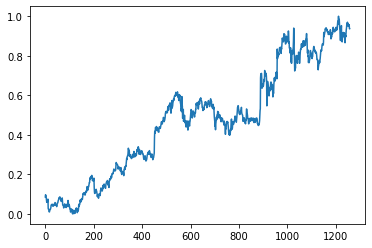

In [12]:
plt.plot(train_scaled)
plt.show()

In [13]:
x_train=[]
y_train=[]

prediction_days=60

for i in range(prediction_days,len(train_scaled)):
    x_train.append(train_scaled[i-prediction_days:i,0])
    y_train.append(train_scaled[i,0])
    
x_train=np.array(x_train)
y_train=np.array(y_train)


In [18]:
X_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
X_train.shape
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [19]:
y_train


array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [22]:
input_shape = (X_train.shape[1], 1)
input_shape

(60, 1)

In [39]:
#build the model

model=Sequential()
model.add(LSTM(60, input_shape = (X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(X_train, y_train, epochs=15, batch_size=1)


Epoch 1/15
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0024
Epoch 2/15
1198/1198 [==============================] - 17s 14ms/step - loss: 8.6536e-04
Epoch 3/15
1198/1198 [==============================] - 20s 17ms/step - loss: 7.3380e-04
Epoch 4/15
1198/1198 [==============================] - 20s 16ms/step - loss: 5.8100e-04
Epoch 5/15
1198/1198 [==============================] - 19s 16ms/step - loss: 4.6000e-04
Epoch 6/15
1198/1198 [==============================] - 19s 16ms/step - loss: 4.2409e-04
Epoch 7/15
1198/1198 [==============================] - 19s 16ms/step - loss: 4.1042e-04
Epoch 8/15
1198/1198 [==============================] - 19s 16ms/step - loss: 3.9529e-04
Epoch 9/15
1198/1198 [==============================] - 19s 16ms/step - loss: 3.7103e-04
Epoch 10/15
1198/1198 [==============================] - 20s 16ms/step - loss: 3.8722e-04
Epoch 11/15
1198/1198 [==============================] - 21s 17ms/step - loss: 3.5778e-04
Epoch 12/15
1198/1198 [

In [24]:
#test data
data_test = pd.read_csv("Google_Stock_Price_Test.csv")
data_test.head() 

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [25]:
actual_stock_price = data_test.loc[:,["Open"]].values
actual_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [43]:
dataset_total = pd.concat((data_train["Open"],data_test["Open"]), axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [44]:
model_inputs = dataset_total[len(dataset_total) - len(data_test) - prediction_days:].values.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
model_inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [45]:
#prediction

X_test = []
for i in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[i-prediction_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

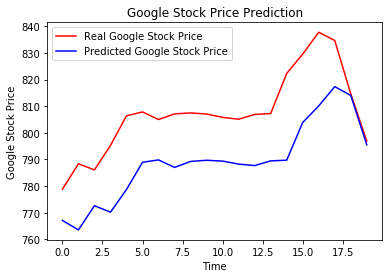

In [46]:
#plot the preducted stock price
plt.plot(actual_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [59]:
real_data=[model_inputs[len(model_inputs)- prediction_days:len(model_inputs),0]]
real_data=np.array(real_data)
real_data.shape
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
prediction=model.predict(real_data)
print(prediction)

[[0.93153274]]
